# S9767AIT

In [2]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/RandomS9767.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,367914D0-45D2-4CBF-9215-04CBA37E9B5D,0.015000,2.474372,130104A,O4O146ATD,NaN
1,367914D0-45D2-4CBF-9215-04CBA37E9B5D,0.025000,2.451775,130104A,O4O146ATD,-2.259700
2,367914D0-45D2-4CBF-9215-04CBA37E9B5D,0.035000,2.304894,130104A,O4O146ATD,-14.688051
3,367914D0-45D2-4CBF-9215-04CBA37E9B5D,0.045000,2.225805,130104A,O4O146ATD,-7.908950
4,367914D0-45D2-4CBF-9215-04CBA37E9B5D,0.055000,2.191909,130104A,O4O146ATD,-3.389550
...,...,...,...,...,...,...
6588,CAF883B3-9B7D-4E3F-90B3-C7AAD5C7922A,1.916667,14.484678,124401A,O4O145ZJ4,-1.129850
6589,CAF883B3-9B7D-4E3F-90B3-C7AAD5C7922A,1.916800,14.484828,124401A,O4O145ZJ4,1.129850
6590,CAF883B3-9B7D-4E3F-90B3-C7AAD5C7922A,1.946667,14.518573,124401A,O4O145ZJ4,1.129850
6591,CAF883B3-9B7D-4E3F-90B3-C7AAD5C7922A,1.956667,14.518573,124401A,O4O145ZJ4,0.000000


In [16]:
from numpy import poly1d

ptype = poly1d([-5.98470216e+01, 4.62084232e+02, -7.85486210e+02, -3.72554117e+03,
                2.15988061e+04, -5.00945381e+04, 6.61536094e+04, -5.30135691e+04,
                2.54733395e+04, -6.92119704e+03, 9.84812921e+02, -6.04968623e+01,
                3.82695571e+00])

pslope_type = poly1d([1.16151120e+04, -1.43951436e+05, 7.83878791e+05, -2.46445616e+06,
                      4.94302908e+06, -6.59694544e+06, 5.93006593e+06, -3.55800781e+06,
                      1.38482863e+06, -3.32646615e+05, 4.55597470e+04, -3.03546572e+03,
                      6.92288828e+01])

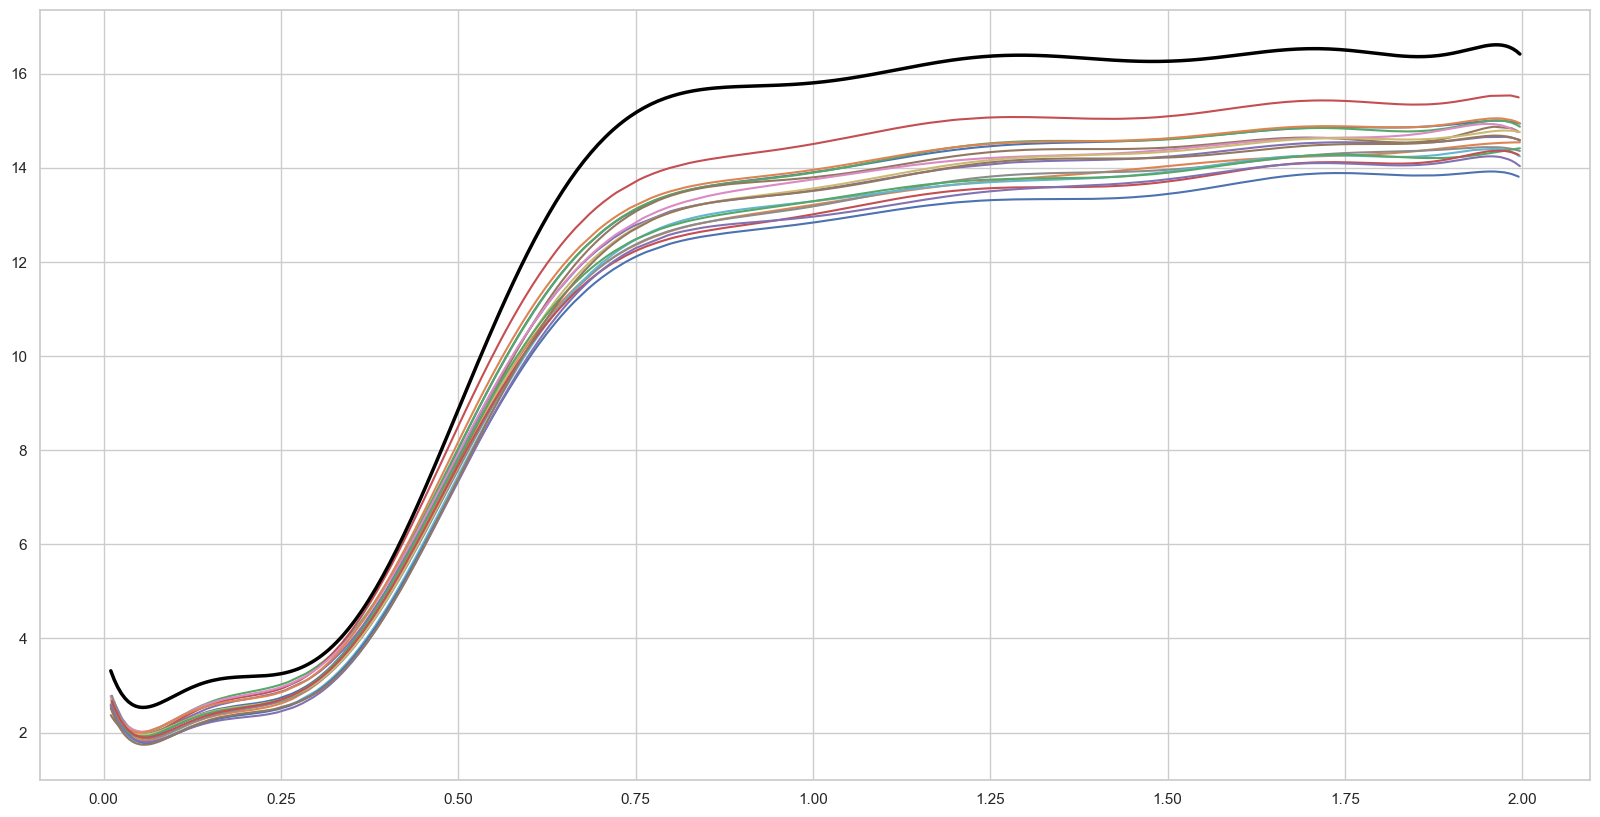

In [17]:
dessiner_commande(df,degree=12, c_type=True, ptype= ptype)

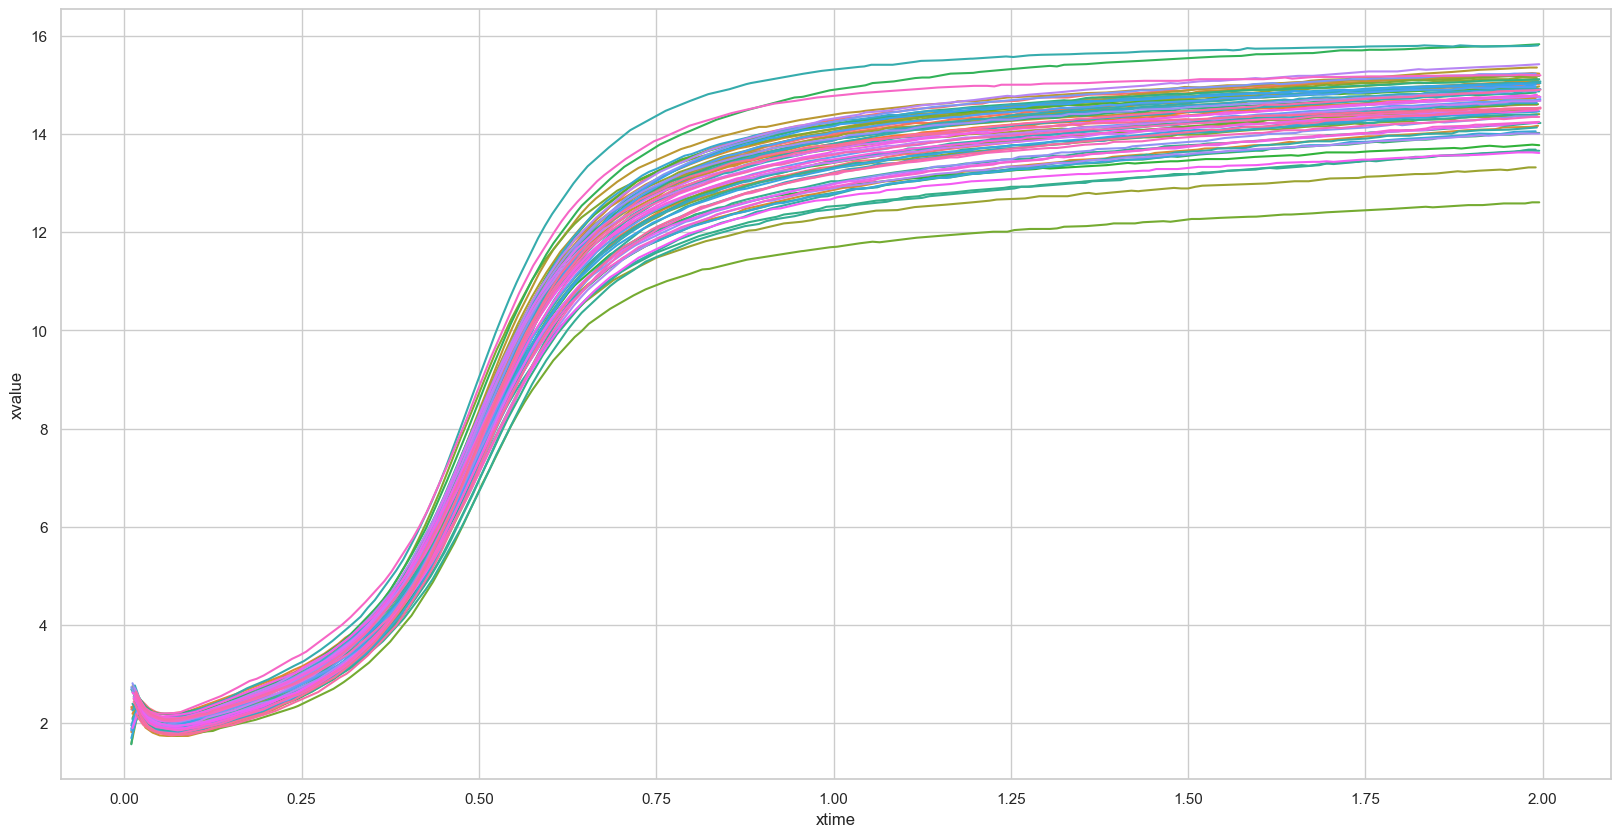

In [5]:
dessiner_commande(df)

## Analyse des pentes

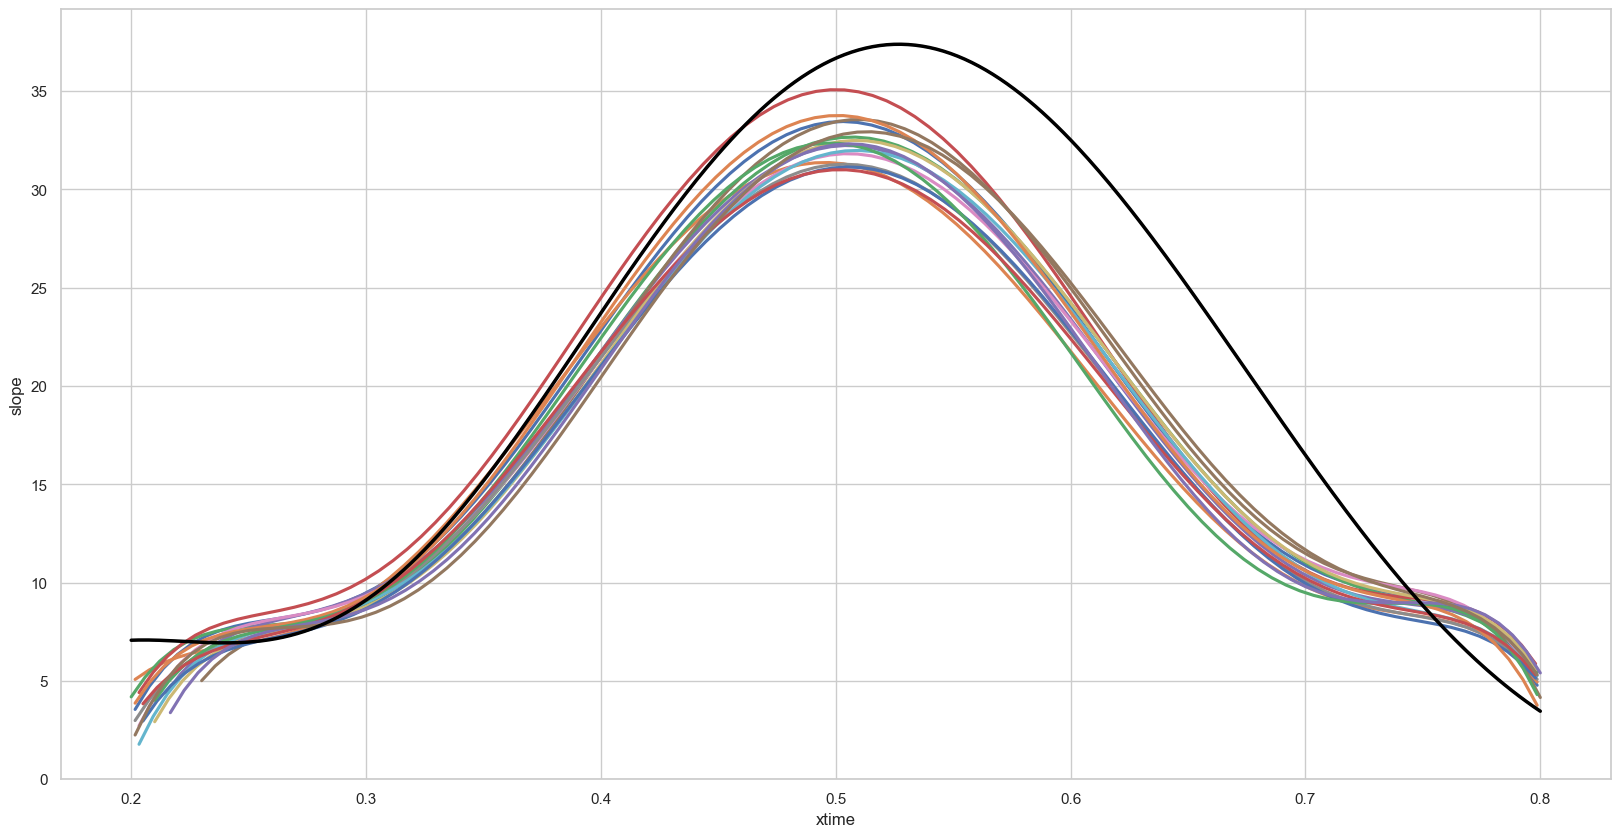

In [12]:
dessiner_commande_slope(df_02_08, 6 ,unified=True, c_type=True, p_slope_type=pslope_type)

## Test Type

- Batch 133209A: 177.47838520503828
- Batch 135813A: 172.380512503018
- Batch 135212A: 158.43873323632056
- Batch 140715A: 154.58165445104416
- Batch 125002A: 147.99621156596714
- Batch 140214A: 143.66905503712832
- Batch 124401A: 141.4584067837658
- Batch 134511A: 138.70580349087712
- Batch 132508A: 137.28894453019043
- Batch 133810A: 123.34782528449097
- Batch 130104A: 122.0574273288084
- Batch 125603A: 117.91007135384372
- Batch 130705A: 115.00142867559275
- Batch 131306A: 108.79935299873654
- Batch 132007A: 94.49922671699898
- Batch 141016A: 73.11340572228481


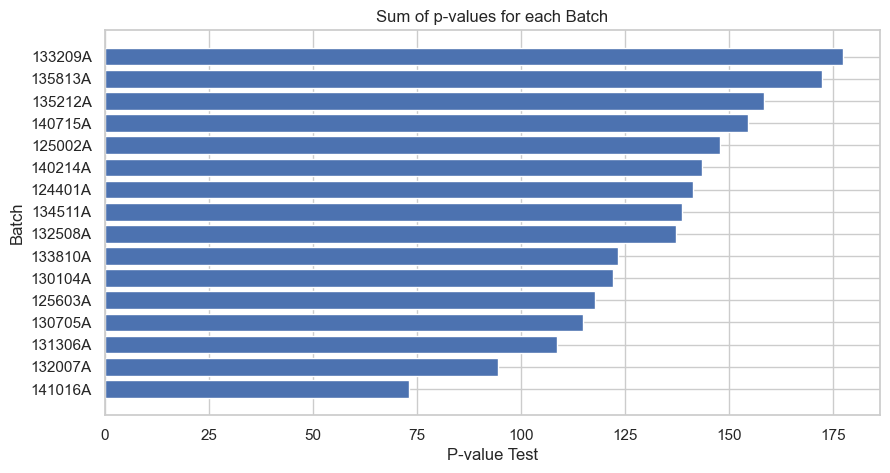

In [43]:
batch_pvalues = ks_batch_test_type_value(df, 12, ptype)

visualiser_batch_pvalue(batch_pvalues, log=True)

- Batch 133209A: 12.420704036800396
- Batch 135813A: 12.342197869858804
- Batch 124401A: 9.9907488353027
- Batch 125002A: 9.925570742017115
- Batch 134511A: 9.76238004285134
- Batch 132508A: 7.365332788121167
- Batch 125603A: 6.976091073360748
- Batch 130104A: 6.941381706441065
- Batch 135212A: 6.893822686414347
- Batch 133810A: 6.6549861348708435
- Batch 140715A: 5.9186118337774065
- Batch 141016A: 5.677393194021297
- Batch 140214A: 5.659426604556875
- Batch 132007A: 5.081460463875824
- Batch 130705A: 4.780268044094207
- Batch 131306A: 4.558816049172461


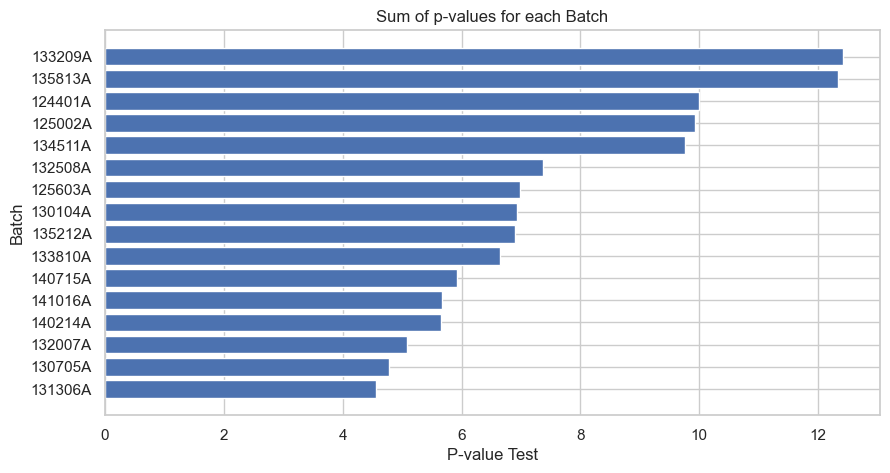

In [44]:
batch_pvalues = ks_batch_test_type_slope(df, 12, pslope_type)

visualiser_batch_pvalue(batch_pvalues, log=True)

In [5]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.5255642654166667

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 135813A est : 2.806 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 140214A est : 2.782 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 131306A est : 1.947 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 132508A est : 1.444 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 130705A est : 1.392 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 132007A est : 1.274 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 125002A est : 1.234 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 133209A est : 1.234 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 134511A est : 1.115 seconde
La différence de temps entre le max de la pente et la médiane po

In [6]:
round(np.std(max_slope_sample_xtime)*1000,2)

19.41

In [7]:
round(np.std(max_slope_batch_xtime)*1000,2)

11.53